# Exercise 7 | Principle Component Analysis and K-Means Clustering

In [2]:
%matplotlib inline

import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn import preprocessing
from sklearn import decomposition

## Part 1: Load Example Dataset

We start this exercise by using a small dataset that is easily to
visualize.

In [3]:
mat = loadmat('ex7data1.mat')
X = mat['X']

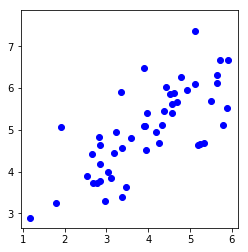

In [4]:
# visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo');
plt.axis([0.5, 6.5, 2, 8]); plt.axis('square');

## Part 2: Principal Component Analysis

You should now implement PCA, a dimension reduction technique.

In [5]:
scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)
pca = decomposition.PCA().fit(X_norm)
U, S = pca.components_.T, pca.explained_variance_
mu = scaler.mean_

Top eigenvector:
U[:, 1] = [-0.70710678 -0.70710678]
(you should expect to see -0.707107 -0.707107, approximate)



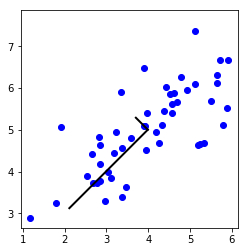

In [6]:
plt.plot(X[:, 0], X[:, 1], 'bo');
plt.axis([0.5, 6.5, 2, 8]); plt.axis('square');

# compute the Y-coordinates.
Y0 = mu + 1.5 * S[0] * U[:, 0]
Y1 = mu + 1.5 * S[1] * U[:, 1]
plt.plot([mu[0], Y0[0]], [mu[1], Y0[1]], '-k', linewidth=2);
plt.plot([mu[0], Y1[0]], [mu[1], Y1[1]], '-k', linewidth=2);

print(f'''Top eigenvector:
U[:, 1] = {U[:, 0]}
(you should expect to see -0.707107 -0.707107, approximate)
''')

## Part 3: Dimension Reduction

You should now implement the projection step to map the data onto the
first k eigenvectors. The code will then plot the data in this reduced
dimensional space. This will show you what the data looks like when
using only the corresponding eigenvectors to reconstruct it.

In [59]:
def project_data(X, U, K):
    X_size = np.size(X, 0)
    Z = np.zeros((X_size, K), dtype=np.float)
    U_reduced = U[:, 0:K]
    for i in range(X_size):
        Z[i] = np.dot(U_reduced.T, X[i, :].T)
        
    return Z

def recover_data(Z, U, K):
    X_recovered = np.zeros((np.size(Z, 0), np.size(U, 1)))
    U_reduced = U[:, 0:K]
    for i in range(np.size(Z, 0)):
        X_recovered[i, :] = (U_reduced * Z[i, :].T).flat
#         print(X_recovered)

    return X_recovered

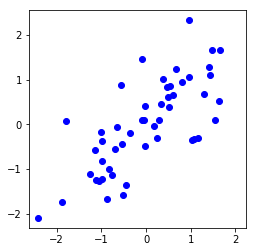

In [90]:
# Plot the normalized dataset (returned from pca)

plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo');
plt.axis([-4, 3, -4, 3]); plt.axis('square');

In [56]:
# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)

print(f'''Projection of the first example: {Z[0][0]}
(this value should be about 1.481274)''');

Projection of the first example: 1.4963126084578517
(this value should be about 1.481274)


In [64]:
X_recovered = recover_data(Z, U, K)
print(f'''Approximation of the first example: {X_recoverd[0, 0]} {X_recoverd[0, 1]}
(this value should be about -1.047419 -1.047419)''');

Approximation of the first example: -1.0580527922154785 -1.058052792215478
(this value should be about -1.047419 -1.047419)


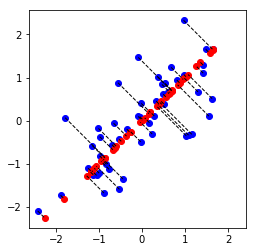

In [113]:
# Draw lines connecting the projected points to the original points

plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo');
plt.plot(X_recovered[:, 0], X_recovered[:, 1], 'ro');
plt.axis([-4, 30, -4, 30]); plt.axis('square');
for i in range(np.size(X_norm, 0)):
    _ = np.vstack((X_norm[i, :], X_recovered[i, :])).T
    plt.plot(_[0], _[1] , '--k', linewidth=1)

# Part 4: Loading and Visualizing Face Data

We start the exercise by first loading and visualizing the
dataset. The following code will load the dataset into your
environment.

In [115]:
mat = loadmat('ex7faces.mat')

error: Error -3 while decompressing data: invalid literal/lengths set

In [117]:
import gzip

In [120]:
loadmat('ex7faces.mat')

error: Error -3 while decompressing data: invalid literal/lengths set